# Predicting Life Expectancy (WHO)
by: Kristofer Rivera - 04/27/2022

## Overview

The data set was acquired from Kaggle user KUMARRAJARSHI: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

"Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population."

## Goal

The goal of this project is to use economic and public health data acquired from the (WHO) World Health Organization spanning 2000 - 2015 to predict life expectancy. 
 
## Process

Upon successful acquistion of the *WHO* dataset from Kaggle. It was then transformed into a series of DataFrames which could be used in exploration and model creation. The intial raw dataframe consisted of, 2938 rows and 22 columns. For data cleaning, columns were renames, null values imputed for using the mean and a dummy variable was created for development status. My cleaned data set had the same amount of rows and columns. Through statistical testing and exploratory analysis, I was able to determine top drivers of life expectancy including: 'income_composition_of_resources', 'schooling', 'hiv_aids', 'gdp', 'developing', and 'bmi.' Using these drivers as features, I built several types of regression models to predict life expectancy and evaluated my best model, a polynomial regression model, on out-of-sample data. This model was able to predict life_expectancy with 84% accuracy and a RMSE score on 3.81. 

In [1]:
# Necessary Imports
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Imports for arithmetic calculations and data frame manipulationimport pandas as pd 
import numpy as np
import pandas as pd

#Imports for statistical analysis
from scipy import stats
import statistics

#Imports for creating visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

#Imports for modeling and evaluation
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

#Imports for user defined functions
import wrangle as wr
import explore as ex
import evaluate as ev

# import image module
from IPython.display import Image

# plotting defaults
plt.rc('figure', figsize=(13, 6))
plt.style.use('seaborn-whitegrid')
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=14)

## Wrangle

The data was acquired by downloading a .csv file from Kaggle. After data acquisition, the table was analyzed, cleaned, columns renamed columns and datatypes standardized. All the preparation can found in wrangle.py 

(https://github.com/kristofer-rivera/predicting-life-expectancy/blob/main/wrangle.py).

#### Acquire Raw Data

In [2]:
df = wr.acquire()
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


*What my raw data looked like before cleaning.*

In [3]:
# Checked null values
wr.attribute_nulls(df)

,rows_missing,percent_missing
Country,0,0.000000
Year,0,0.000000
Status,0,0.000000
Life expectancy,10,0.003404
Adult Mortality,10,0.003404
infant deaths,0,0.000000
Alcohol,194,0.066031
percentage expenditure,0,0.000000
Hepatitis B,553,0.188223
Measles,0,0.000000


**Dealt with null values by imputing with the mean for all continuous variables.**

#### Acquire Cleaned and Split Data

**Cleaning Steps:**
- Converted all strings to lowercase and replace white spaces with underscores
- Changed year to object type as it categorical
- Renamed columns for further clarity and format uniformity
- Iputed for null values using the mean for continuous variables
- Created a dummy variable for the development satus column√

In [4]:
train, validate, test = wr.wrangle_who()
train.shape, validate.shape, test.shape

((1645, 22), (705, 22), (588, 22))

In [5]:
train.head()

,country,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_composition_of_resources,schooling,developing
1782,Myanmar,2013,66.2,22.0,42,0.700000,38.337935,75.000000,1010,22.1,...,2.16000,75.0,0.4,1168.839470,51448196.0,12.9,13.2,0.540,9.1,1
946,Gabon,2015,66.0,229.0,2,4.602861,0.000000,8.000000,27,36.3,...,5.93819,8.0,2.7,7388.984144,193175.0,6.1,5.9,0.694,12.6,1
1682,Mauritius,2000,71.0,177.0,0,4.600000,336.321333,88.000000,0,25.3,...,3.78000,88.0,0.1,3861.324140,1186873.0,8.1,8.1,0.667,12.1,1
2629,Togo,2003,54.7,355.0,15,1.020000,2.995960,80.940461,295,17.9,...,5.00000,72.0,5.2,31.437144,539141.0,8.8,8.7,0.428,9.9,1
422,Burundi,2009,56.2,338.0,23,4.050000,2.030495,94.000000,305,15.7,...,6.96000,94.0,2.4,24.944652,848931.0,7.8,7.8,0.336,8.6,1


*What my data looked like after cleaning and preparation.*

### Exploration

**I started by visualizing life expectancy for each country.**

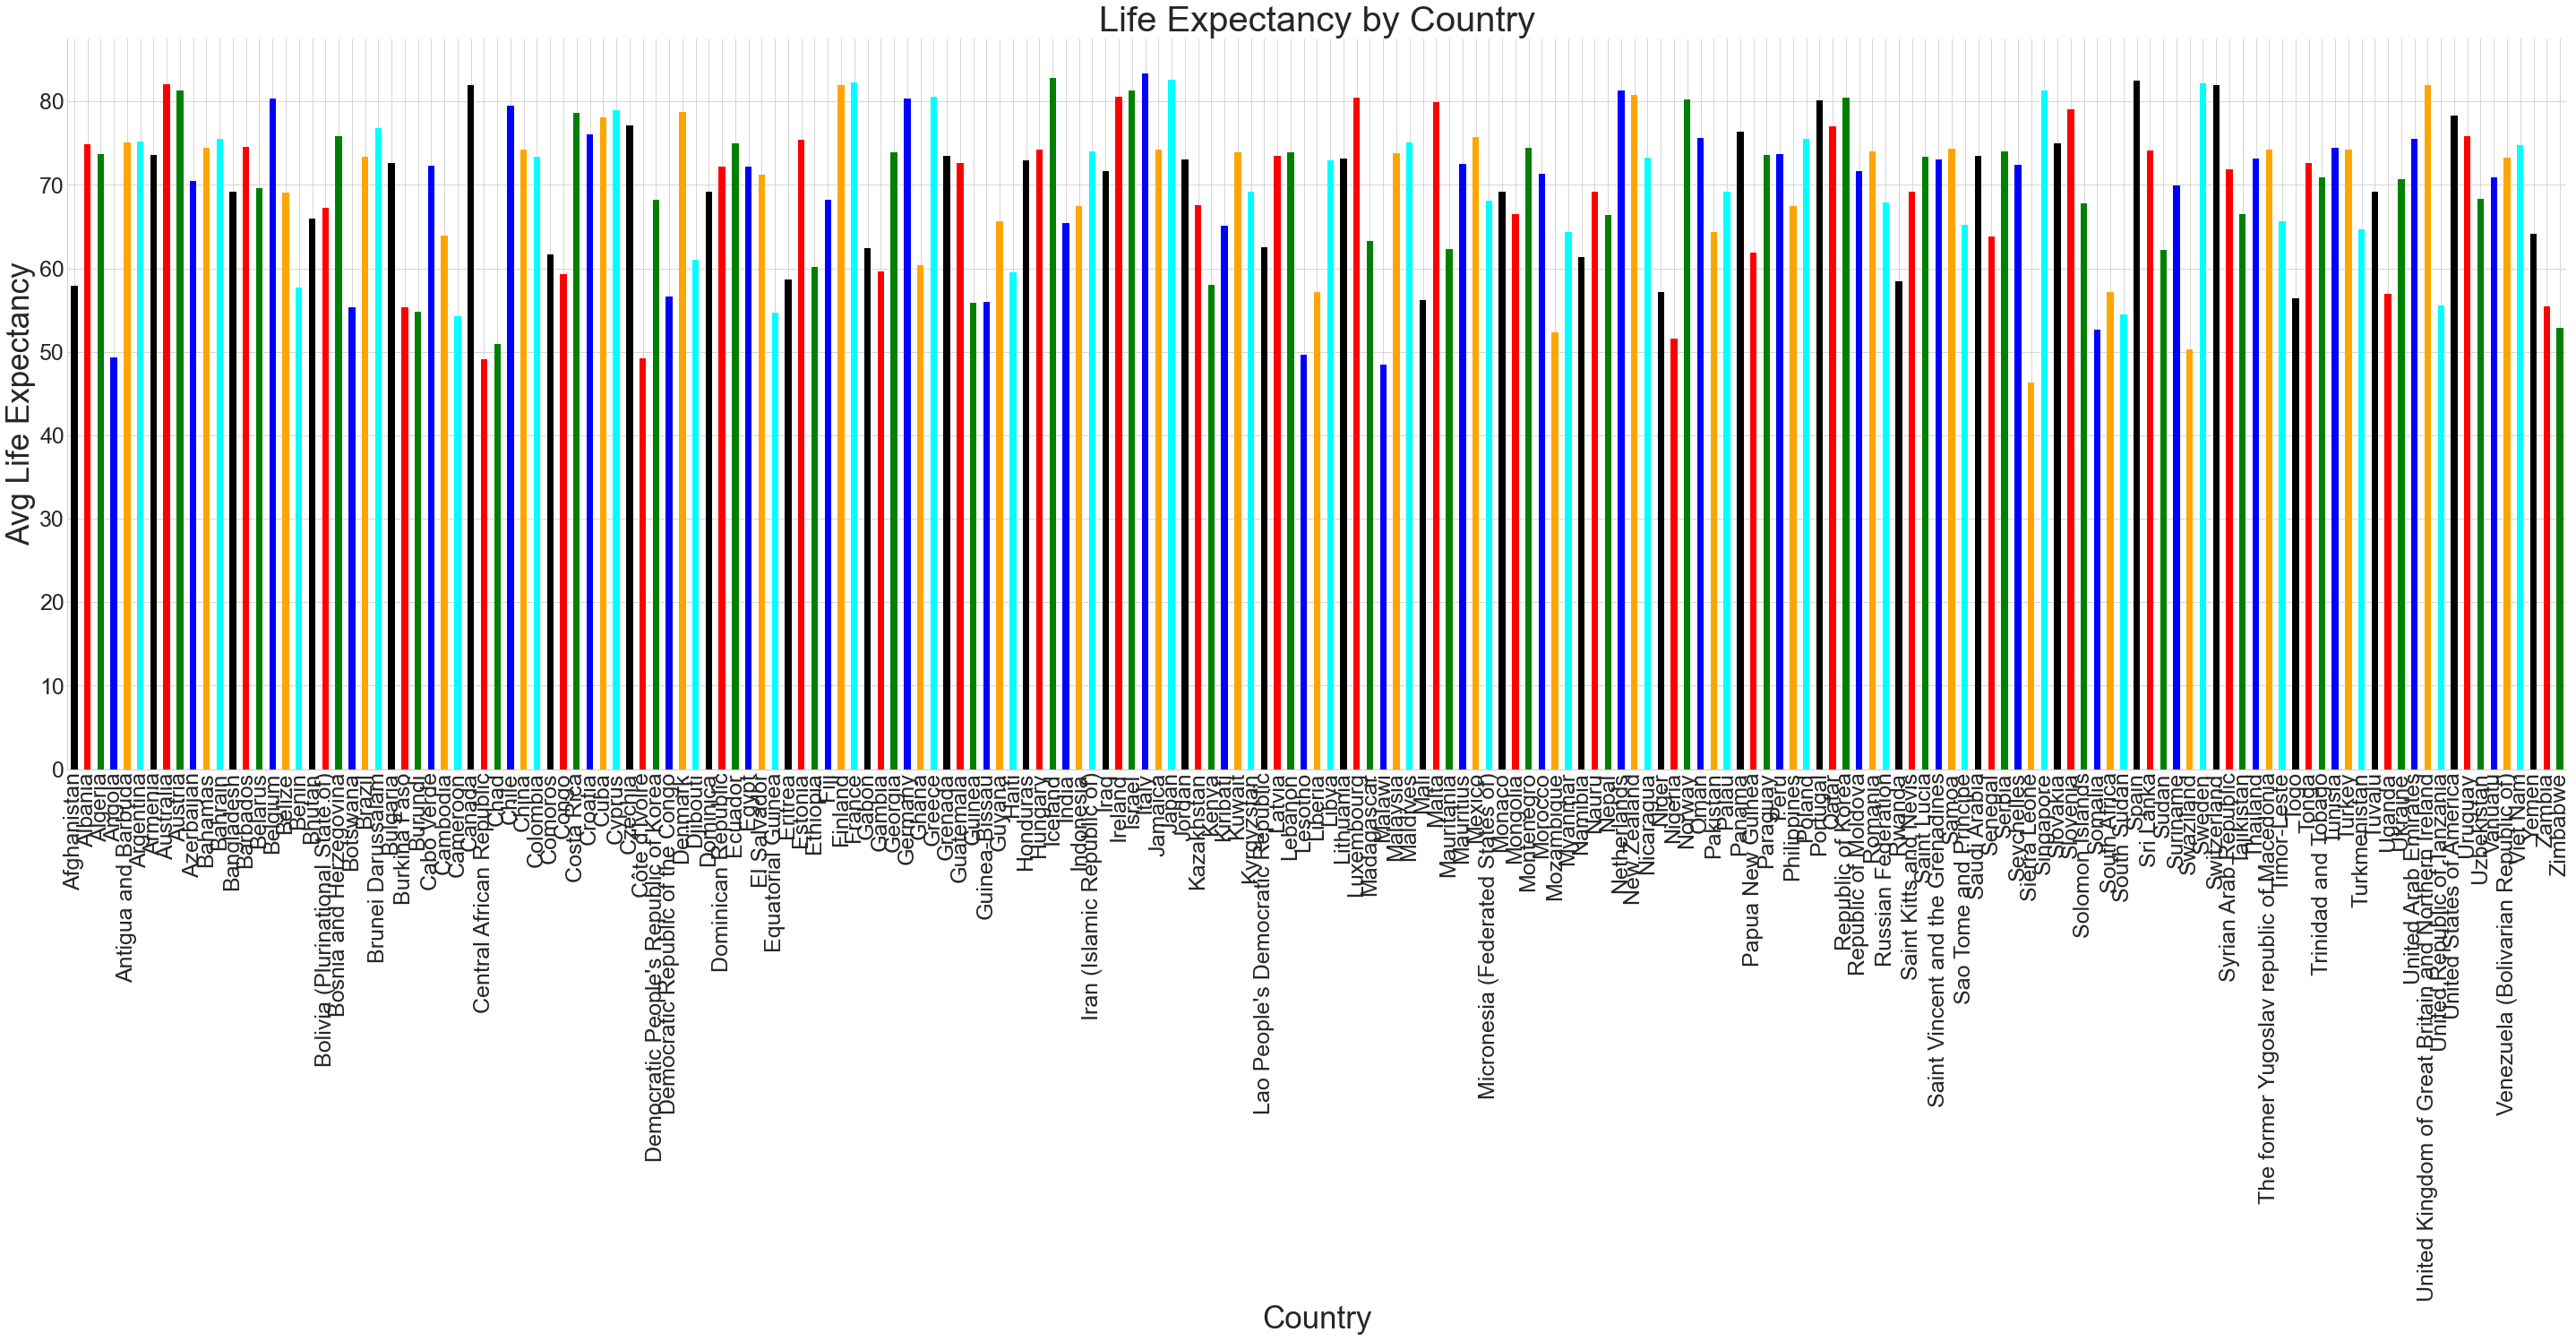

In [6]:
ex.countries(train)

*Clear divisions between different countries life expectancies.*

**Next, I wanted to see how life expectancy varied by the years in my dataset.**

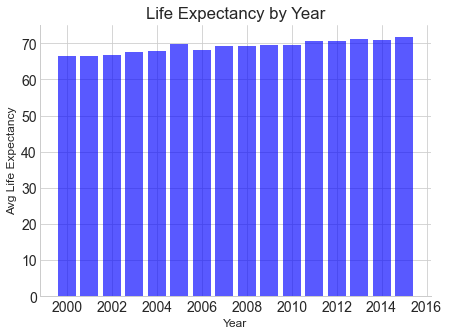

In [7]:
ex.years(train)

*We see a steady increase in life expectancy through the years which is what we should expect as the world progressivly becomes more developed.*

**Before moving on to asking focused questions, I wanted to plot the correlations of all my variables with my target.**

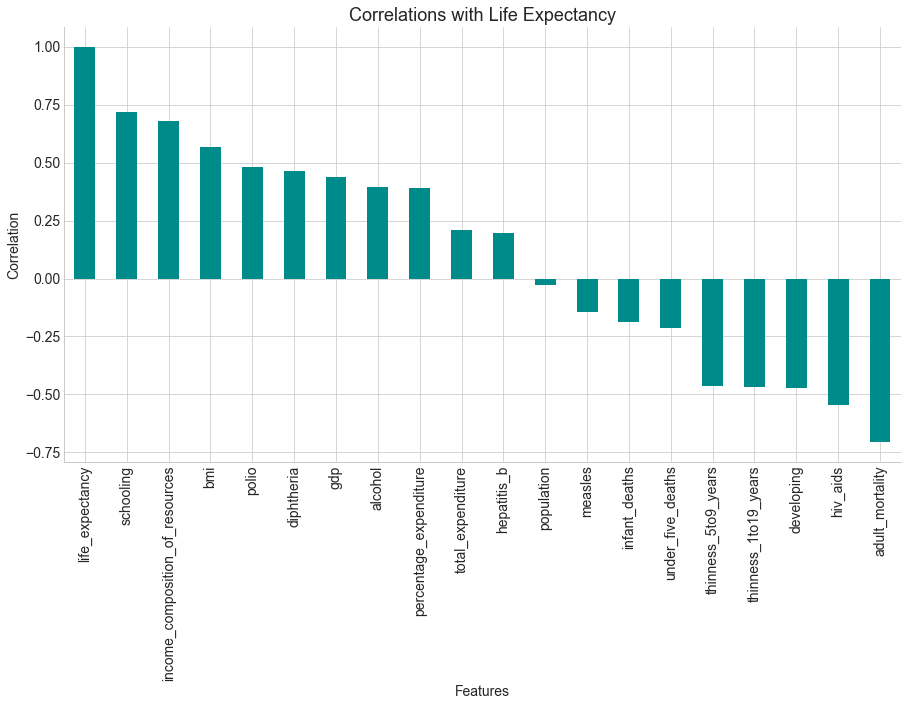

In [8]:
# Checking assessed_value correlation vs all variables

ex.plot_correlations(train)

*I immediately detect some strong correlations with my target variable, life expectancy. Schooling and income composition have the strongest positive correlation while adult_mortality and hiv_aids have very strong negative correlations. These are strong candidates for statistical testing and further exploration.* 

**Next, I created a heatmap of correlations to dig a little deeper.**

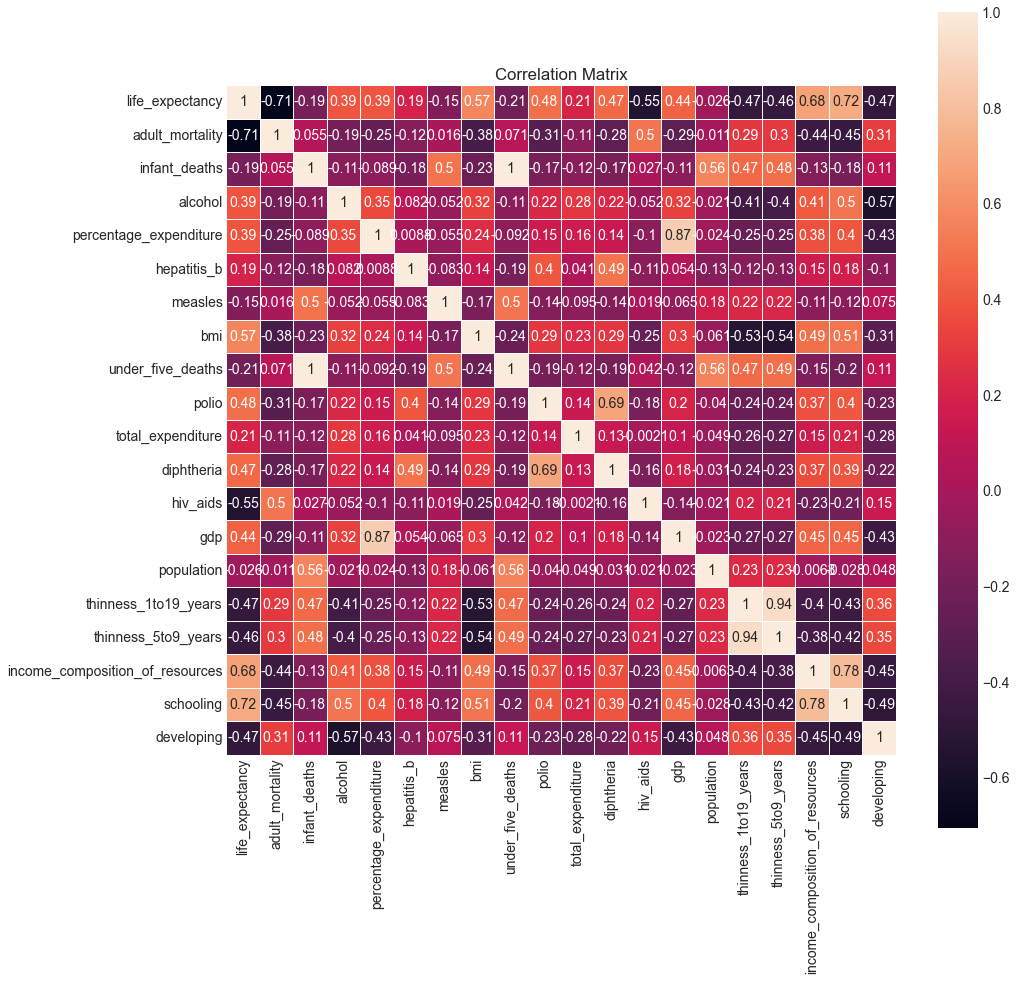

In [9]:
ex.heatmap(train)

*Takeaways:*

- Life expectancy negatively correlated with adult mortality, which makes perfect sense since. 
- Life expectancy highly correlated with income composition and schooling.
- Infant deaths and under five deaths are perfectly correlated. They seem like they are duplicate features measuring the same thing.
- Percentage expenditure and gdp are highly correlated.
- Measles and under five deaths are moderately correlated
- BMI and the thinness variables are negatively correlated.
- Polio and diphtheria are highly correlated.
- Schooling and diphtheria have a moderate correlation.
- Population and infant deaths/under five deaths are highly correlated.
- Thinness variables are highly correlated to eachother. If you're thin as an infant you're likely thin as an adolescent.
- Schooling and income composition are highly correlated.
- Alcohol is negatively correlated with developing countries.

### Focused Questions to Answer

1. Is there a linear relationship between income composition of resources and life expectancy?
2. Is there a linear relationship between schooling and life expectancy? Is this a real correlation or is it because schooling is correlated with income composition? Which is the more important causal variable for life expectancy?
3. Is there a significant relationship between being a developing country and infant mortality?
4. Is there a signifiant relationship between gdp and life expectancy?
5. Is there a linear relationship between hiv_aids prevelance and life expectancy?
6. Is there a linear relationship between bmi and life expectancy?

*Setting my confidence level at 95% which makes my alpha = .05*


## Question 1: Is there a linear relationship between income composition of resources and life expectancy?

$H0$: Income composition of resources and life expectancy are not linearly correlated.

$Ha$: Income composition of resources and life expectancy are linearly correlated.

In [10]:
target = train.life_expectancy
ex.pearsonr(train.income_composition_of_resources, target )

The correlation value between the two variables is 0.6795 and the P-Value is 2.755585597724049e-223.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


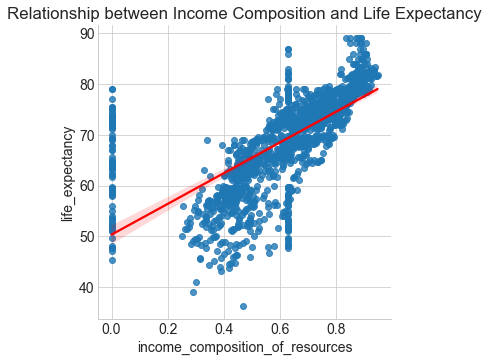

In [11]:
# Create a line plot with regression line to visualize relationship
sns.lmplot(x='income_composition_of_resources', y='life_expectancy', data=train, line_kws={'color':'red'})
plt.title('Relationship between Income Composition and Life Expectancy')
plt.show()

## 2. Is there a linear relationship between schooling and life expectancy? Is this a real correlation or is it because schooling is correlated with income composition? Which is the more important causal variable for life expectancy?

$H0$: Schooling and life expectancy are not linearly correlated.

$Ha$: Schooling and life expectancy are linearly correlated.

In [12]:
ex.pearsonr(train.schooling, target )

The correlation value between the two variables is 0.717 and the P-Value is 8.231478299453136e-260.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


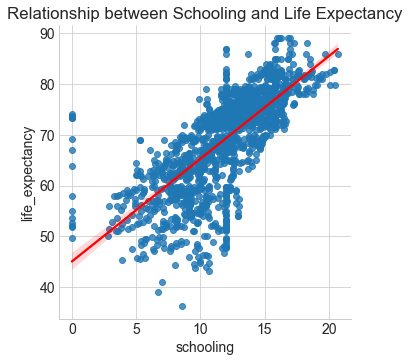

In [13]:
# Create a line plot with regression line to visualize relationship
sns.lmplot(x='schooling', y='life_expectancy', data=train, line_kws={'color':'red'})
plt.title('Relationship between Schooling and Life Expectancy')
plt.show()

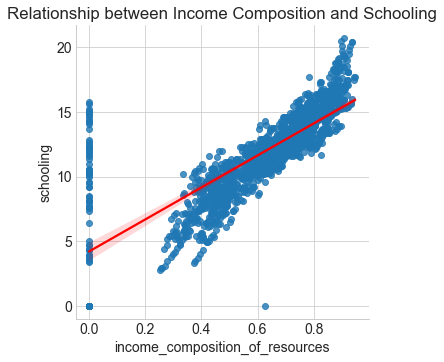

In [14]:
# Let's visualize the relationship between schooling and income composition
sns.lmplot(x='income_composition_of_resources', y='schooling', data=train, line_kws={'color':'red'})
plt.title('Relationship between Income Composition and Schooling')
plt.show()

*There's a clear linear relationship between the two. That said, schooling has a slightly higher correlation with life expectancy than income_composition though the relationship looks remarkably similar suggesting they are deeply intertwined. I suspect the income_composition is what drives schooling and is the true driver of life_expectancy.*

## 3. Is there a significant relationship between being a developing country and infant deaths(mortality)?

$H0$: Being a developing country and infant mortality are independent of eachother.

$Ha$: Being a developing country and infant mortality are dependent on eachother.

In [15]:
ex.chi2(train.developing, train.infant_deaths)

The chi2 value between the two variables is 283.50600404494804 and the P-Value is 2.694225742010064e-08.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


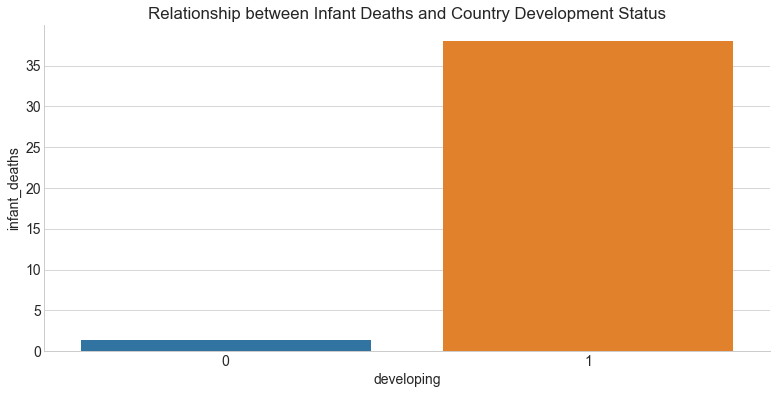

In [16]:
#Plot a barpplot to visualize relationship between variables
sns.barplot(data=train, y='infant_deaths', x='developing', ci=None)
plt.title('Relationship between Infant Deaths and Country Development Status')
plt.show()

**A related question is how does development status affect overall life expectancy?**

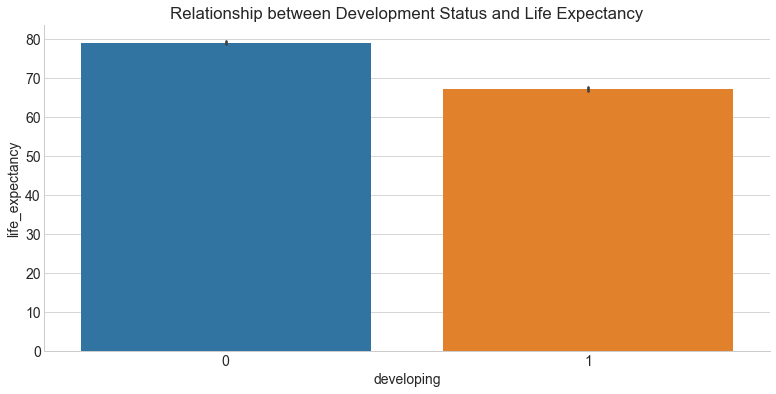

In [17]:
# Let's look at developing countries and life_expectancy
sns.barplot(x='developing', y='life_expectancy', data= train)
plt.title('Relationship between Development Status and Life Expectancy')
plt.show()

*Countries that are still developing see much higher rates of infant mortality and as expected, we see higher life expectancy among developed countries.*

## 4. Is there a signifiant relationship between gdp and life expectancy?

$H0$: GDP and life expectancy are not linearly correlated.

$Ha$: GDP and life expectancy are linearly correlated.

In [18]:
ex.pearsonr(train.gdp, target)

The correlation value between the two variables is 0.4398 and the P-Value is 8.718050871336223e-79.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


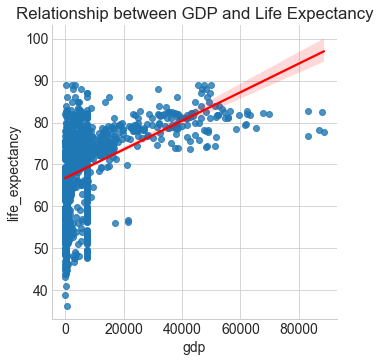

In [19]:
# Create a line plot with regression line to visualize relationship
sns.lmplot(x='gdp', y='life_expectancy', data=train, line_kws={'color':'red'})
plt.title('Relationship between GDP and Life Expectancy')
plt.show()

## 5. Is there a linear relationship between hiv_aids prevelance and life expectancy?

$H0$: HIV prevelance and life expectancy are not linearly correlated.

$Ha$: HIV prevelance and life expectancy are linearly correlated.

In [20]:
ex.pearsonr(train.hiv_aids, target)

The correlation value between the two variables is -0.5475 and the P-Value is 2.8503874566418877e-129.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


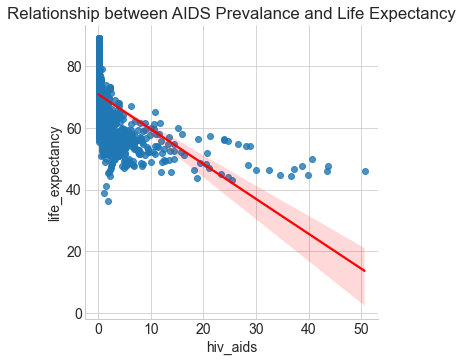

In [21]:
sns.lmplot(x='hiv_aids', y='life_expectancy', data=train, line_kws={'color':'red'})
plt.title('Relationship between AIDS Prevalance and Life Expectancy')
plt.show()

## 6. Is there a linear relationship between bmi and life expectancy?

$H0$: BMI and life expectancy are not linearly correlated.

$Ha$: BMI and life expectancy are linearly correlated.

In [22]:
ex.pearsonr(train.bmi, target)

The correlation value between the two variables is 0.5673 and the P-Value is 9.384497585199734e-141.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


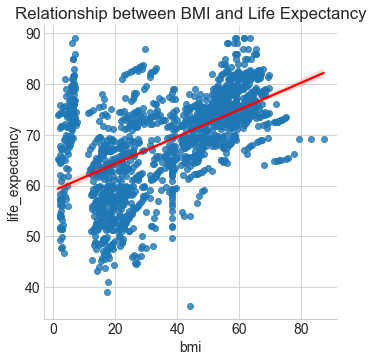

In [23]:
sns.lmplot(x='bmi', y='life_expectancy', data=train, line_kws={'color':'red'})
plt.title('Relationship between BMI and Life Expectancy')
plt.show()

*A very clear positive linear relationship here which is confusing as I would suspect higher bmi is negatively correlated with life expectancy. Not sure what's goin on with the data here but my statistical tests confirms a signifiant linear relationship.*

Takeaways: 

To reduce dimensionality, I created regression models that utilized my top drivers as confirmed by my statistical tests. 

These features include:
- income_composition_of_resources
- schooling
- hiv_aids
- gdp
- developing
- bmi

## Modeling

In [24]:
#Imports for preprocessing
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
#Imports for modeling and evaluation
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

### Preprocessing/Data Scaling

**Before modeling, I scaled my data using a MinMax Scaler.**

In [25]:
train_scaled, validate_scaled, test_scaled = wr.scale_data(train, validate, test)

In [26]:
# Scaled data
train_scaled.head()

,country,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_composition_of_resources,schooling,developing
1782,Myanmar,2013,0.567362,0.029412,0.024706,0.040636,0.002037,0.752577,0.004760,0.240978,...,0.089086,0.750000,0.005941,0.013179,0.043612,0.468864,0.462898,0.569620,0.439614,1
946,Gabon,2015,0.563567,0.319328,0.001176,0.270487,0.000000,0.061856,0.000127,0.406286,...,0.311988,0.052083,0.051485,0.083413,0.000164,0.219780,0.204947,0.732068,0.608696,1
1682,Mauritius,2000,0.658444,0.246499,0.000000,0.270318,0.017868,0.886598,0.000000,0.278231,...,0.184661,0.885417,0.000000,0.043581,0.001006,0.293040,0.282686,0.703586,0.584541,1
2629,Togo,2003,0.349146,0.495798,0.008824,0.059482,0.000159,0.813819,0.001390,0.192084,...,0.256637,0.718750,0.100990,0.000336,0.000457,0.318681,0.303887,0.451477,0.478261,1
422,Burundi,2009,0.377609,0.471989,0.013529,0.237927,0.000108,0.948454,0.001437,0.166473,...,0.372271,0.947917,0.045545,0.000263,0.000720,0.282051,0.272085,0.354430,0.415459,1


*This is what my train data set looked like after scaling.*

**I created X variables that include all features except country and year. I subset when modeling to only include what I determined as top drivers in exploration or features selected through RFE.**

In [27]:
#Unscaled data
X_train, y_train = train.drop(columns=['life_expectancy', 'year', 'country']), train.life_expectancy
X_validate, y_validate = validate.drop(columns=['life_expectancy', 'year', 'country']), validate.life_expectancy
X_test, y_test = test.drop(columns=['life_expectancy', 'year', 'country']), test.life_expectancy

#Scaled data
X_train_scaled, y_train_scaled = train_scaled.drop(columns=['life_expectancy', 'year', 'country']), train_scaled.life_expectancy
X_validate_scaled, y_validate_scaled = validate_scaled.drop(columns=['life_expectancy', 'year', 'country']), validate_scaled.life_expectancy
X_test_scaled, y_test_scaled = test_scaled.drop(columns=['life_expectancy', 'year', 'country']), test_scaled.life_expectancy

### Feature Selection

**I used recursive feature elimination to select 5 top featues. I created regression models that used features I idenitified as top drivers from my exploratory analysis and other models that used the features identified using RFE.**

In [28]:
features_to_use, feature_rankings = ev.select_rfe(X_train_scaled, y_train, 5, return_rankings=True)

#print(feature_rankings.sort_values())
print(' \n Use the following features: \n')
print(feature_rankings)

 
 Use the following features: 

adult_mortality                     1
infant_deaths                       1
alcohol                            14
percentage_expenditure              2
hepatitis_b                        13
measles                             6
bmi                                 4
under_five_deaths                   1
polio                               5
total_expenditure                  12
diphtheria                          8
hiv_aids                            1
gdp                                 9
population                         10
thinness_1to19_years                7
thinness_5to9_years                15
income_composition_of_resources     3
schooling                           1
developing                         11
dtype: int64


**My top features identified using RFE are: adult_mortality, infant_deaths, under_five_deaths, hiv_aids, and schooling.**

*Some of these features line up well with what I determined to be top drivers. I noticed that some of these features seem to measure very similar things such as infant_deaths and under_five_deaths.*

### Establish Baseline

**I calculated both the mean and median of life_expectancy, created predictions using those and evaluated using RMSE to choose which to use as a baseline model.**


In [29]:
#First convert y_train into Dataframes so the baselines can be easily calculated with pandas
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test =pd.DataFrame(y_test)

# 1. Predict mean life expectancy
le_pred_mean = y_train.life_expectancy.mean()
y_train['le_pred_mean'] = le_pred_mean
y_validate['le_pred_mean'] = le_pred_mean
y_test['le_pred_mean'] = le_pred_mean

# 2. Predict median life expectancy 
le_pred_median = y_train.life_expectancy.median()
y_train['le_pred_median'] = le_pred_median
y_validate['le_pred_median'] = le_pred_median
y_test['le_pred_mean'] = le_pred_mean

# 3. RMSE of le_pred_mean
rmse_train = mean_squared_error(y_train.life_expectancy, y_train.le_pred_mean) ** 0.5
rmse_validate = mean_squared_error(y_validate.life_expectancy, y_validate.le_pred_mean) ** 0.5

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of le_pred_median
rmse_train1 = mean_squared_error(y_train.life_expectancy, y_train.le_pred_median) ** .5
rmse_validate1 = mean_squared_error(y_validate.life_expectancy, y_validate.le_pred_median) ** .5
print('-----------')
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train1, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate1, 2))

RMSE using Mean
Train/In-Sample:  9.34 
Validate/Out-of-Sample:  9.9
-----------
RMSE using Median
Train/In-Sample:  9.76 
Validate/Out-of-Sample:  10.28


**I moved forward with the mean as my baseline since it had the better performing RMSE.**

**I then created dataframes to hold my model predictions and metrics to aid in side by side evaluation and visualization.**

In [30]:
## Create a dataframe to hold my model predictions to help with side by side evaluation and visualization
predictions = y_validate.copy()
predictions = predictions.rename(columns={'life_expectancy':'actual'})
predictions.head()

,actual,le_pred_mean,le_pred_median
2561,66.1,69.142462,72.0
545,83.0,69.142462,72.0
2178,73.1,69.142462,72.0
144,72.7,69.142462,72.0
2338,74.3,69.142462,72.0


In [31]:
# Add the mean baseline to a df to help evaluate models side by side
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline',
    'rmse_outofsample': rmse_validate,
    'r^2_outofsample': explained_variance_score(y_validate.life_expectancy, y_validate.life_expectancy)}])

### Creating Regression Models

**I created 7 different regression models using features selected through RFE as well as features I chose from my EDA determinations.**

**My models are listed here:**

Model 1 - Simple Model (Ordinary Least Squares)

Model 2 - LASSO + LARS

Model 3 - Generalized Linear Model

Model 4 - Polynomial Regression

Model 5 - Simple Model (Ordinary Least Squares) -- RFE Selected Features

Model 6 - Generalized Linear Model -- RFE Selected Features

Model 7 - Polynomial Regression -- RFE Selected Features

**Evaluation Metrics for these models are displayed here:**

In [32]:
# get the image
Image(url="model_metrics.png", width=600, height=900)

*For more information and code documentation for these models refer to the modeling.ipynb in this repository:*

https://github.com/kristofer-rivera/predicting-life-expectancy/blob/main/modeling.ipynb

**My best performing model was Model 7. This was Polynomial Regression model built using the features selected using RFE.**

### Evaluating Best Model on Test Data

**Here, I'll show code used to create my model and evaluation on the test data split.**

### Model 7 - Polynomial Regression -- RFE

#### Create the Polynomial Features

In [33]:
## Create the polynomial features

#This list contains the features selected using Recursive Feature Elimination
rfe_features = ['infant_deaths', 'adult_mortality', 'under_five_deaths', 'hiv_aids', 'schooling']

# Create polynomial features
pf = PolynomialFeatures(degree=2)

# fit to my features and create a new version of X_train with transformed features
X_train_poly = pf.fit_transform(X_train_scaled[rfe_features])

# Transform features on X_validate and X_test
X_validate_poly = pf.transform(X_validate_scaled[rfe_features])
X_test_poly = pf.transform(X_test_scaled[rfe_features])

#### Create the Model

In [34]:
## Model 7 - Polynomial Regression Model

#Create model
lm3 = LinearRegression(normalize=True)

# Fit the model on train
# use only the features we selected
lm3.fit(X_train_poly, y_train.life_expectancy)

#Predict on train and validate
# predict train
y_train['le_pred_poly_rfe'] = lm3.predict(X_train_poly)
# predict validate
y_validate['le_pred_poly_rfe'] = lm3.predict(X_validate_poly)

# Calculate RMSE
train_rmse7 = ev.rmse(y_train.life_expectancy, y_train.le_pred_poly_rfe)
validate_rmse7= ev.rmse(y_validate.life_expectancy, y_validate.le_pred_poly_rfe)

#Calculate R^2 Score
r2_train7 = r2_score(y_train.life_expectancy, y_train.le_pred_poly_rfe)
r2_validate7 = r2_score(y_validate.life_expectancy, y_validate.le_pred_poly_rfe)

print("RMSE using OLS\nTrain/In-Sample: ", train_rmse7, 
      "\nValidate/Out-of-Sample: ", validate_rmse7)

print("R2 Score using OLS\nTrain/In-Sample: ", r2_train7, 
      "\nValidate/Out-of-Sample: ", r2_validate7)

RMSE using OLS
Train/In-Sample:  3.4372834552466993 
Validate/Out-of-Sample:  3.8156095519110624
R2 Score using OLS
Train/In-Sample:  0.8644181633536105 
Validate/Out-of-Sample:  0.8515682590513287


In [35]:
# Add to predictions df
predictions['le_pred_poly_rfe'] = y_validate.le_pred_poly_rfe

# add model's performance to metric df
metric_df = metric_df.append(
    {
    'model': 'polynomial_rfe',
    'rmse_outofsample': validate_rmse7,
        'r^2_outofsample': r2_validate7}, ignore_index=True)

**I created a quick visualization of performance by plotting residuals.**

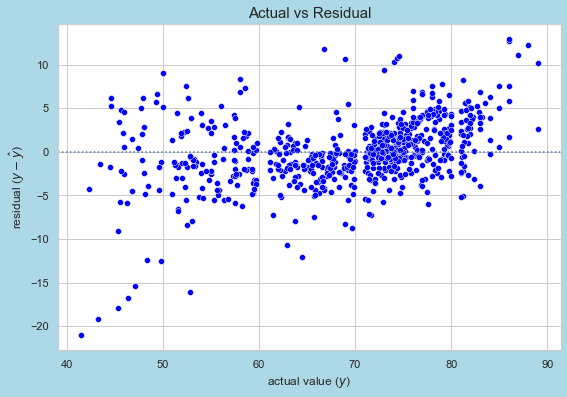

In [36]:
# Visualize by plotting residuals
ev.plot_residuals(predictions.actual, predictions.le_pred_poly_rfe, predictions)

#### Model Evaluation on Test Data

In [37]:
# predict test
y_test['le_pred_poly_rfe'] = lm3.predict(X_test_poly)


# Calculate RMSE
test_rmse7= ev.rmse(y_test.life_expectancy, y_test.le_pred_poly_rfe)

#Calculate R^2 Score
r2_test7 = r2_score(y_test.life_expectancy, y_test.le_pred_poly_rfe)

print("RMSE using OLS\nTrain/In-Sample: ", train_rmse7, 
      "\nValidate/Out-of-Sample: ", test_rmse7)

print("R2 Score using OLS\nTrain/In-Sample: ", r2_train7, 
      "\nValidate/Out-of-Sample: ", r2_test7)

RMSE using OLS
Train/In-Sample:  3.4372834552466993 
Validate/Out-of-Sample:  3.8130495914939666
R2 Score using OLS
Train/In-Sample:  0.8644181633536105 
Validate/Out-of-Sample:  0.8385496835023726


In [38]:
# add model's performance to metric df
metric_df = metric_df.append(
    {
    'model': 'polynomial_rfe_test',
    'rmse_outofsample': test_rmse7,
        'r^2_outofsample': r2_test7}, ignore_index=True)

metric_df

,model,rmse_outofsample,r^2_outofsample
0,mean_baseline,9.904188,1.000000
1,polynomial_rfe,3.815610,0.851568
2,polynomial_rfe_test,3.813050,0.838550


**This model lost very little performance when evaluated on test data.**

### Visualize Model Performance

**I created a data frame to compare model predictions to the actual values and mean baseline values.**

In [39]:
## Create a dataframe to hold my model performance on test and to help with side by side evaluation and visualization
predictions_test = y_test.copy()
predictions_test = predictions_test.rename(columns={'life_expectancy':'actual'})
predictions_test.head()

,actual,le_pred_mean,le_pred_poly_rfe
775,72.7,69.142462,71.326294
527,46.0,69.142462,45.512971
553,78.9,69.142462,76.961181
2670,74.8,69.142462,77.323078
2047,75.3,69.142462,75.241045


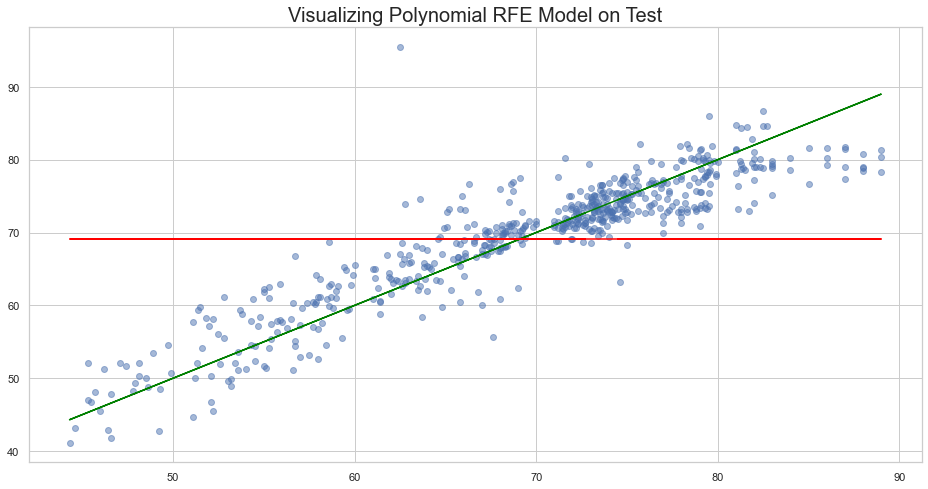

In [40]:
ev.viz1(predictions_test)

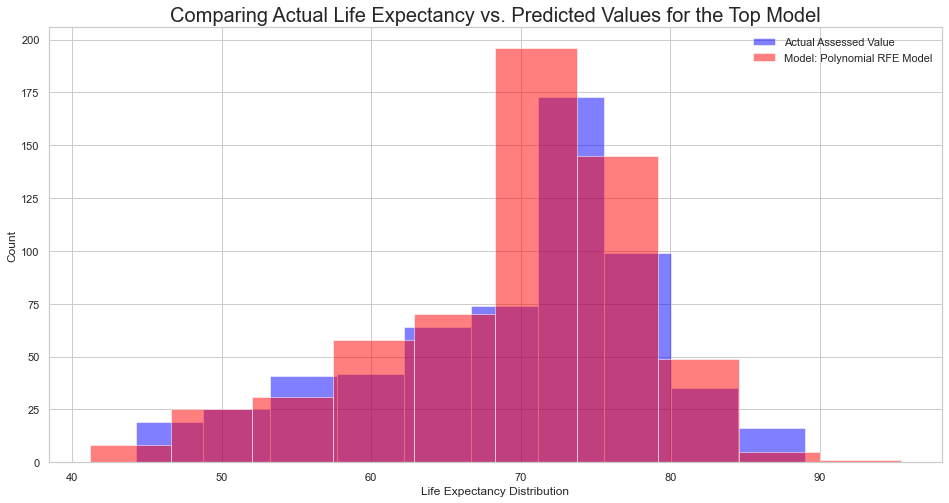

In [41]:
ev.viz2(predictions_test)

## Conclusion

The goal of this project was to use economic and public health data acquired from the (WHO) World Health Organization spanning 2000 - 2015 to predict life expectancy. 

**I was able to create a Polynomial Regression model that predicts life expectancy with 83% accuracy and an RMSE of 3.81.**
 

### Findings/Recommendations

**Based on my analysis, I've determined several drivers of life expectancy. These drivers include:**
- Schooling/Education
- GDP
- BMI
- Income Composition of Resources
- Prevention of HIV/ADIS
- Immunization against Polio, Hapatitis B, Measles


**Given more up-to-date, verified data, I would recommend use of my findigns and machine learning model to help guide economic and public health policy decisions with the goal of improving a population's life expectancy.**

### Next steps

Given more time we would like to: 
 - Seek more up to data, improved data to improve predictions.
 - Conduct more feature enginerring, perhaps clustering features that are closely linked such as deaths under five and infant deaths.
 - Try models using different paramaters. 